Сытник Вероника ФН12-31М

Вариант 10

In [2]:
data = [25.0000,35.0000,70.1038,84.5303,119.5981,-7.5172,119.9330,-1.4221,293.6667,-49.6642,159.0527,127.0557,136.2653,164.3801,
        199.0974,150.3093,143.5554,108.0112,261.2849,158.9485,310.6697,183.2096,236.4357,303.1682,256.8915,246.8249,309.4960,
        257.9478,444.6323,316.2758,364.1915,348.7780,287.5978,384.0246,336.7386,359.6682,484.9397,271.0097,413.5242,412.4660,
        426.3690,511.7404,373.6591,532.1087,440.7739,497.9429,441.6739,501.2538,604.2300,434.7302,606.0768,471.2449,685.2812,
        576.4088,662.4752,459.0886,640.3297,532.5155,660.7406,485.0263,729.8990,638.9653,673.6654,667.3964,686.5004,763.2054,
        668.5730,720.1473,776.8435,688.6064,746.5756,842.8371,624.1283,772.3539,715.1324,739.4710,842.2981,764.8168,848.4336,
        907.2527,716.0300,987.4091,720.1152,1031.9428,775.7215,957.3348,835.9828,883.1102,918.6166,968.6066,954.2682,918.8956,
        992.5183,935.3576,991.4509,978.3907,944.6625,1077.5152,929.9026,1153.4844,944.1242,1130.1029,934.2922,1287.4132,946.1756,
        1252.9690,942.2875,1199.3560,920.1098,1327.9799,1025.3957,1228.7079,1041.2672,1267.9531,1123.8040,1303.8799,1177.1663,
        1267.8995,1177.2875,1256.2141,1192.6951,1332.2928,1097.8389,1410.0089,1245.1156,1247.2260,1350.8053,1287.6591,1319.4396,
        1361.6961,1293.6288,1358.5628,1225.0286,1374.5823,1240.7892,1423.1759,1320.2498,1440.8703,1336.6941,1359.3949,1449.4506,
        1346.3175,1531.9715,1432.9602,1479.4825,1368.5968,1429.6616,1528.4216,1438.2690,1554.8129,1432.9626,1534.7793,1582.4953,
        1459.3582,1696.5657,1470.5440,1734.5468,1430.6352,1694.6880,1582.5133,1640.2080,1480.2197,1818.0879,1516.0005,1930.4322,
        1500.7392,1877.0032,1470.3804,1827.4579,1631.7799,1841.1922,1602.7677,1933.0599,1599.2733,1841.7906,1605.3239,1899.3051,
        1715.9789,1890.1766,1705.5104,1880.5807,1730.7058,1938.8621,1765.6631,1947.4175,1844.6158,1863.0230,1967.2029,1811.9477,
        1918.9145,1850.7010,1944.2233,1973.2225,1896.6238,1998.8234,1940.3606,2018.0113,2085.5026,2008.8944,1935.0329]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.array(data)
time = np.arange(1,201)

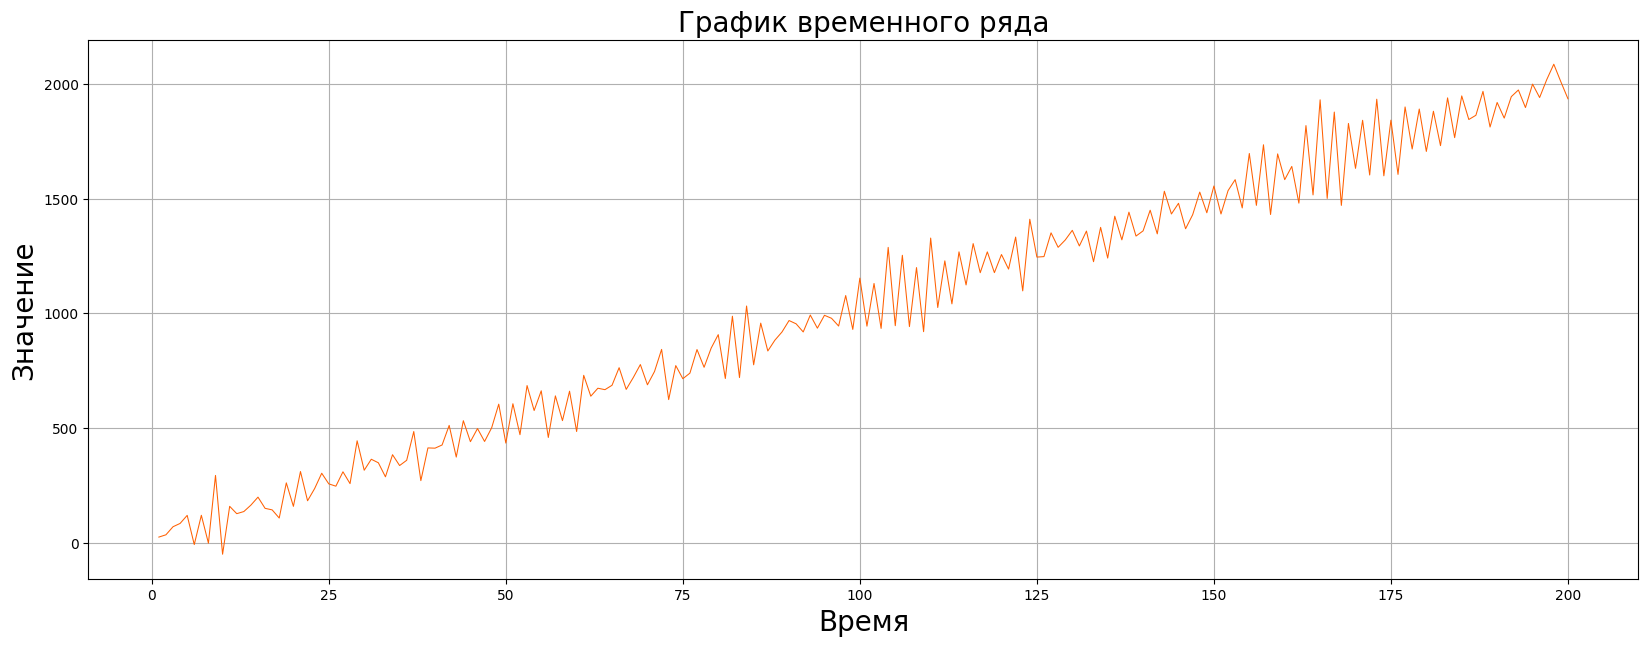

In [5]:
#Размер фигуры
plt.figure(figsize=(20,7))
#Построение графика
plt.title('График временного ряда', fontsize=20)
plt.plot(time, data, color = '#FF6103', linewidth=0.75)
#Оси
plt.xlabel('Время', fontsize=20,)
plt.ylabel('Значение', fontsize=20)
plt.grid(True)

plt.show()


 Можно предполагать <font color ='red' >отсутствие сезонности </font>, но наличие <font color = 'green'> линейного тренда

## **Задание 1.**

### Коррелограмма (выборочная автокорреляционная функция данных)

Figure(640x480) Figure(640x480)


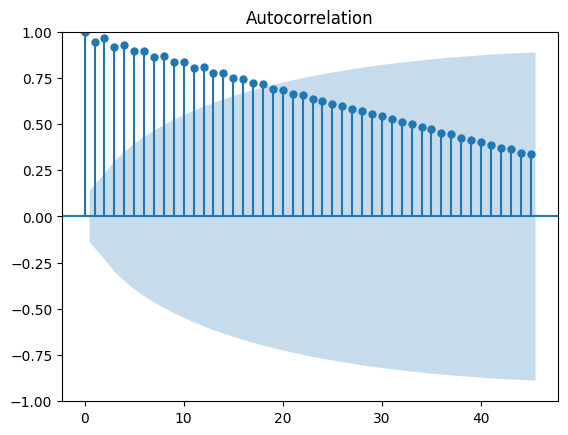

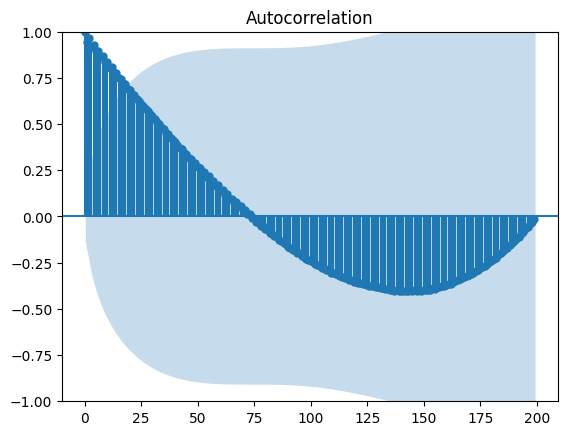

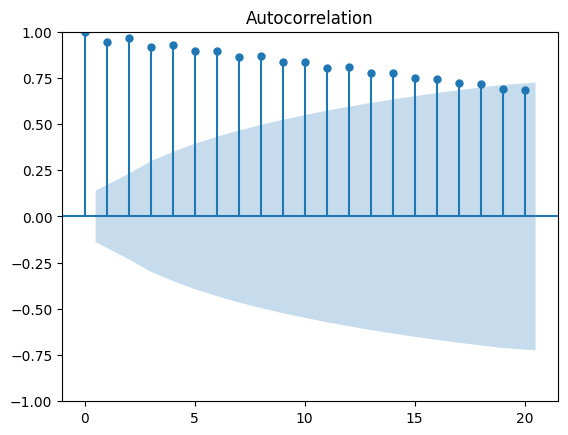

In [8]:
#Построение Коррелограмма
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

output_plt_1 = plot_acf(data, lags = 45)
output_plt_1 = plot_acf(data, lags = 199)
output_plt_2 = plot_acf(data, lags = 20)
print(output_plt_1, output_plt_2)

Графики выше позволяют понять, что предыдущие значения влияют на текущие, но значимость этого влияния со временем неуклонно снижается. А именно, начиная с 18го лага.

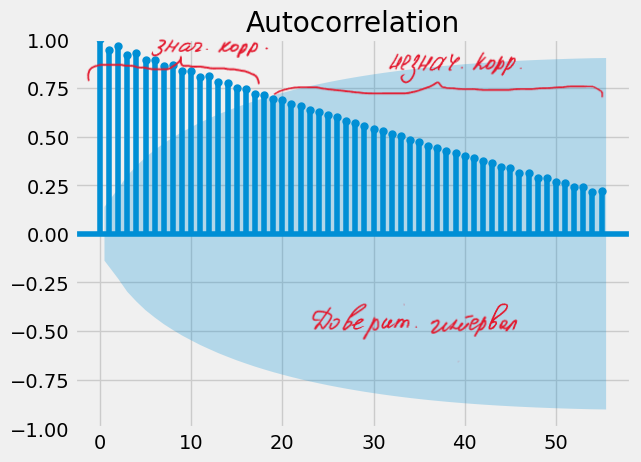

### Выборочная частная автокорреляционная функция данных

In [9]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

<Figure size 1000x500 with 0 Axes>

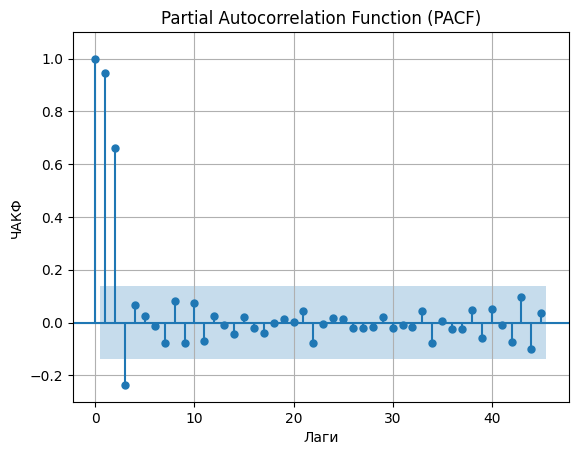

In [10]:
pacf_values = pacf(data, nlags=20)

# Построение ЧАКФ
plt.figure(figsize=(10, 5))
plot_pacf(data, lags=45)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Лаги')
plt.ylabel('ЧАКФ')
plt.ylim([-0.3,1.1])
plt.grid(True)
plt.show()

###Оценка детерминированной состовляющей ряда

$m_t = f_t +s_t$,

где
 $m_t$ - детерминированная составляющая ряда

$f_t$ - тренд

$s_t$ - сезонность

В данной работе предполагаем, что сезонного поведения у ряда нет.

####Удаление тренда


Для математического описания функции тренда $f(t) = f(t,θ)$, где θ есть
вектор неизвестных параметров, из графика временного ряда выберем следующую модель:

$ f(t,θ) = θ_0 +θ_1t$

И с помощью МНК определим $θ_0$ и $θ_1$

In [11]:
t_sum = np.sum(time)
t_sum_sq = np.sum(time**2)

time_series_t = np.sum(data*time)
time_series = np.sum(data)

target = np.vstack([time_series_t, time_series])

#Решение СЛАУ
coefficients = np.linalg.inv(np.array([[t_sum, t_sum_sq], [len(time), t_sum]])) @ target

In [12]:
#Оцененные параметры линейного тренда
coefficients

array([[26.27282308],
       [ 9.92046713]])

Получили параметры линейной модели тренда:

$\theta_0 = 26.27282308$

$\theta_1 = 9.92046713$

Получим сам тренд:

In [13]:
trend = coefficients[0] + coefficients[1]*time

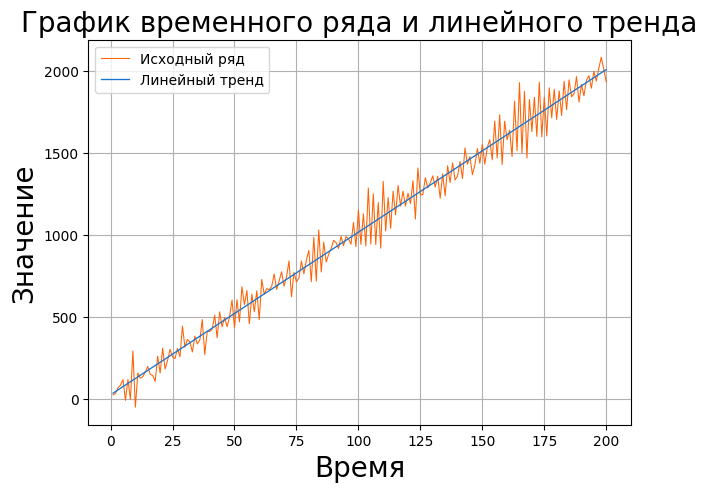

In [14]:
plt.figure(figsize = (7,5))
#Построение графика
plt.title('График временного ряда и линейного тренда', fontsize=20)
plt.plot(time, data, color = '#FF6103', linewidth=0.75, label = 'Исходный ряд')
plt.plot(time, trend, label = 'Линейный тренд', linewidth=0.95,  color = '#1874CD')
#Оси
plt.xlabel('Время', fontsize=20,)
plt.ylabel('Значение', fontsize=20)
plt.legend()

plt.grid(True)

plt.show()

## **Задание 2.**

###Детрендирование ряда

Так как в ряду отсутствует сезонность, достаточно избавиться от детерминированной состоявляющей путем избавления от тренда

In [15]:
data_detrended = data - trend

Text(0, 0.5, 'Значение')

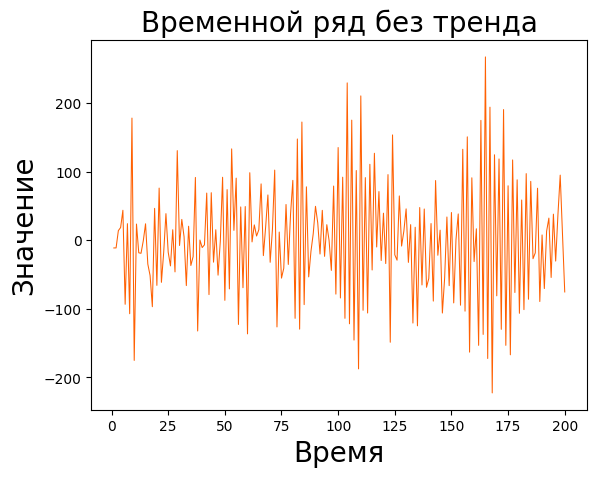

In [16]:
plt.title('Временной ряд без тренда', fontsize=20)
plt.plot(time, data_detrended, color = '#FF6103', linewidth=0.75)
plt.xlabel('Время', fontsize=20,)
plt.ylabel('Значение', fontsize=20)

Построим АКФ и ЧАКФ

<Figure size 1000x500 with 0 Axes>

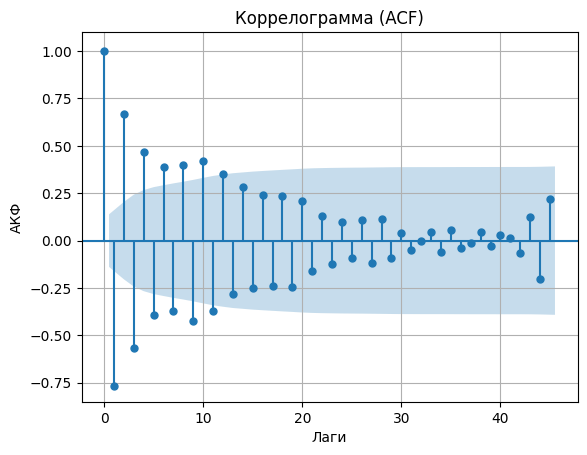

In [22]:
# Построение ЧАКФ
plt.figure(figsize=(10, 5))
plot_acf(data_detrended, lags = 45)
plt.title('Коррелограмма (ACF)')
plt.xlabel('Лаги')
plt.ylabel('АКФ')
plt.ylim([-0.85,1.1])
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

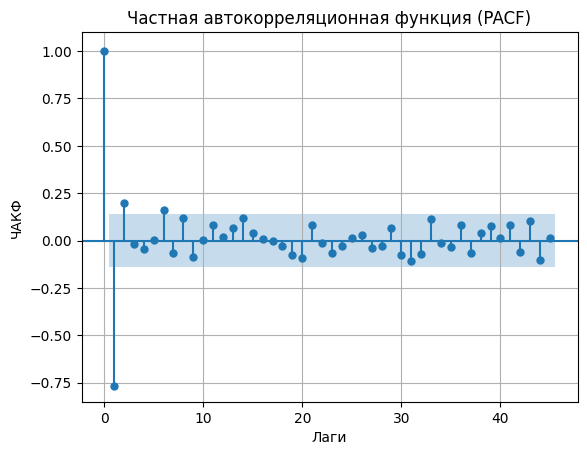

In [18]:
# Построение ЧАКФ
plt.figure(figsize=(10, 5))
plot_pacf(data_detrended, lags=45)
plt.title('Частная автокорреляционная функция (PACF)')
plt.xlabel('Лаги')
plt.ylabel('ЧАКФ')
plt.ylim([-0.85,1.1])
plt.grid(True)
plt.show()

## **Задание 3.**

###Проверка на стационарность

Воспользуемся тестом Дики-Фуллера. Этот метод представляет количественную оценку стационарности временного ряда. Основная гипотеза теста предполагает, что ряд динамики не стационарен. Если значение p меньше уровня значимости 0.05 в результате теста, то основная гипотеза отвергается, и ряд может считаться стационарным.

In [19]:
from statsmodels.tsa.stattools import adfuller

In [29]:
data_result = adfuller(data)
data_labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
for result_value, label in zip(data_result, data_labels):
    print(label + ' : ' + str(result_value))

if data_result[1] <= 0.05:
    print("Ряд является стационарным.")
else:
    print("Ряд не является стационарным.")

ADF Test Statistic : -0.35435427555765237
p-value : 0.9174455669724889
#Lags Used : 13
Number of Observations Used : 186
Ряд не является стационарным.


Используя уже детрендированный ряд, проведем идентификацию случайной составляющей ряда, выбрав в качестве моделей:

AR(p)

MA(q)

ARMA(p,q)

Модель ARIMA обычно обозначается как ARIMA (p, d, q), где p, d и q — параметры модели:

p — порядок авторегрессии, который описывает количество предыдущих наблюдений, принимаемых во внимание в модели.

d — порядок интегрирования, который указывает, сколько раз нужно взять разность временного ряда для достижения стационарности.

q — порядок скользящего среднего, который связан с количеством предыдущих ошибок, используемых в модели

In [41]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [42]:
warnings.filterwarnings("ignore")

## **Задание 4.**

### Модель AR(p)


In [43]:
# Модель AR(2)
model_ar = ARIMA(data_detrended, order=(2, 0, 0))
model_ar_fit = model_ar.fit()
print('AR(2) Описание:')
print(model_ar_fit.summary())

AR(2) Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1089.582
Date:                Mon, 02 Dec 2024   AIC                           2187.165
Time:                        07:26:02   BIC                           2200.358
Sample:                             0   HQIC                          2192.504
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1287      2.821      0.046      0.964      -5.401       5.658
ar.L1         -0.6154      0.072     -8.525      0.000      -0.757      -0.474
ar.L2          0.1929      0.074     

### Модель MA(q)

In [26]:
# Модель MA(2)
model_ma = ARIMA(data_detrended, order=(0, 0, 2))
model_ma_fit = model_ma.fit()
print('MA(2) описание:')
print(model_ma_fit.summary())

MA(2) описание:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1114.354
Date:                Mon, 02 Dec 2024   AIC                           2236.708
Time:                        06:57:29   BIC                           2249.902
Sample:                             0   HQIC                          2242.048
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2828      3.319      0.085      0.932      -6.223       6.788
ma.L1         -0.6401      0.069     -9.241      0.000      -0.776      -0.504
ma.L2          0.3635      0.076    

### Модель ARMA(p,q)

In [27]:
# Модель ARMA(2,2)
model_arma = ARIMA(data_detrended, order=(2, 0, 2))
model_arma_fit = model_arma.fit()
print('ARMA(2,2) описание:')
print(model_arma_fit.summary())

ARMA(2,2) описание:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1089.053
Date:                Mon, 02 Dec 2024   AIC                           2190.105
Time:                        06:57:32   BIC                           2209.895
Sample:                             0   HQIC                          2198.114
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1374      2.669      0.051      0.959      -5.093       5.368
ar.L1         -1.6580      0.307     -5.393      0.000      -2.261      -1.055
ar.L2         -0.6724      0.280

## **Задание 5.**

### Критерий Акаике

Информационный критерий Акаике (AIC) позволяет сравнивать несколько статистических моделей друг с другом, чтобы определить, какая из них лучше соответствует данным. Считается, что наилучшей будет модель с наименьшим значением критерия AIC.


In [44]:
# Сравнение моделей по критерию  Акаике AIC
print('AR(2) AIC:', model_ar_fit.aic)
print('MA(2) AIC:', model_ma_fit.aic)
print('ARMA(2,2) AIC:', model_arma_fit.aic)

AR(2) AIC: 2187.164749343302
MA(2) AIC: 2236.7084693480265
ARMA(2,2) AIC: 2190.10533433365


|Модель|AIC|
|---|---|
|AR(p)|2187.16|
|MA(q)|2236.7|
|ARMA(p,q)|2190.1|



### Критерий Шварца

Выбираем модель с наименьшим значением BIC в качестве модели, которая лучше всего соответствует данным.

In [45]:
# Сравнение моделей по критерию Шварца BIC
print('AR(2) BIC:', model_ar_fit.bic)
print('MA(2) BIC:', model_ma_fit.bic)
print('ARMA(2,2) BIC:', model_arma_fit.bic)

AR(2) AIC: 2200.3580188094943
MA(2) AIC: 2249.901738814219
ARMA(2,2) AIC: 2209.895238532938


|Модель|BIC|
|---|---|
|AR(p)|2200.35|
|MA(q)|2249.9|
|ARMA(p,q)|2209.89|


Из результатов критериев можно сделать вывод, что наиболее **адекватная модель AR(2)**

## **Задание 6.**

Text(0.5, 1.0, 'Residuals')

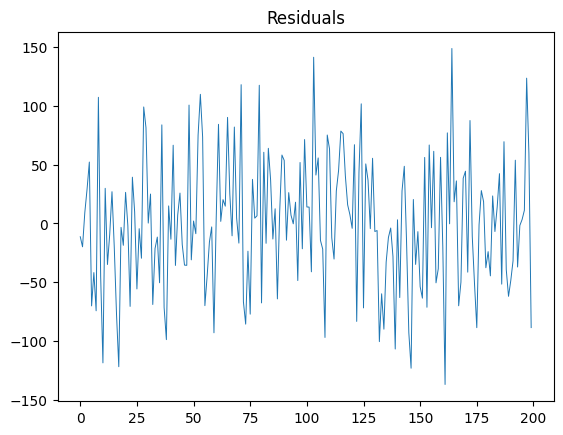

In [58]:
residuals = model_ar_fit.resid
plt.plot(residuals, linewidth = 0.7)
plt.title('Residuals')

Из графиков видно, что АКФ и ЧАКФ процесса εˆt можно считать равными нулю
(графики лежат в трубке ±0.2).

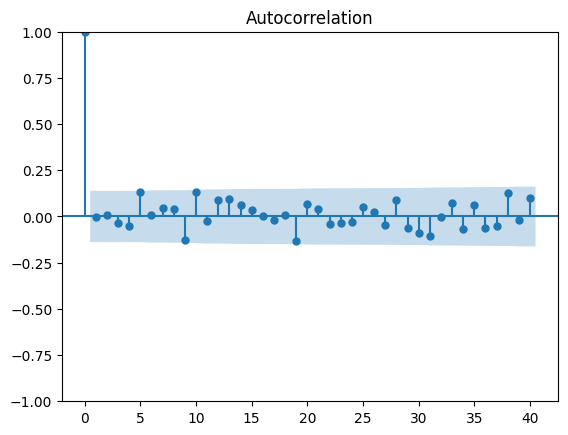

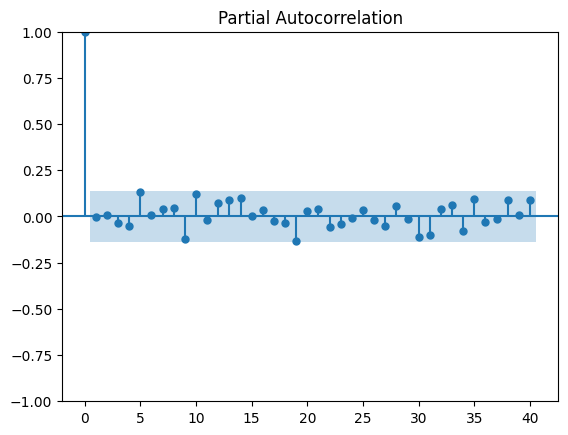

In [60]:
result_1 = plot_acf(residuals, lags=40)
result_2 = plot_pacf(residuals, lags=40)